# Play Store App Rating Prediction

This project aims to predict the ratings of apps available on the Google Play Store by analyzing various attributes such as category, reviews, installs, size, price, and content rating.
The analysis involves exploring the dataset, performing data preprocessing, visualization, and building a machine learning model using Spark and TensorFlow.

## Technologies Used:Python:
#### Python:
Programming language used for data manipulation, analysis, and modeling.

#### Pandas:
Python library used for data loading, cleaning, and processing.

#### Matplotlib and Seaborn:
Python libraries used for data visualization.

#### Apache Spark:
Open-source analytics engine used for parallel data processing and analysis, suitable for big data.

#### TensorFlow:
Open-source machine learning library used for building and training deep learning models.


## Project Steps:

#### Data Loading and Inspection:
The dataset is loaded using Pandas and inspected to understand its structure and content.

#### Exploratory Data Analysis: 
Basic statistics, such as the number of rows and columns, data types, and summary statistics, are computed to gain insights into the dataset.

#### Missing Data Handling:
Missing values in the dataset are identified and handled appropriately.

#### Categorical Column Analysis:
Unique values and frequencies of categorical columns are examined to understand their distribution.

#### Data Visualization:
Visualizations such as bar plots and scatter plots are created to explore relationships between variables and gain further insights into the dataset.

#### Spark and TensorFlow Integration:
Apache Spark is used for data processing and feature engineering. Then, a deep learning model is built and trained using TensorFlow.

#### Model Evaluation:
The performance of the model is evaluated, and the results are reported.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('Data.csv')

In [3]:
# Show the size of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 267030
Number of columns: 9


In [4]:
# Show data types
print("\nData Types:\n", df.dtypes)



Data Types:
 App Name           object
Category           object
Rating            float64
Reviews           float64
Installs           object
Size              float64
Price             float64
Content Rating     object
Game_genre         object
dtype: object


In [5]:
# Display the first five rows
print("\nFirst Five Rows:\n", df.head())


First Five Rows:
                                             App Name          Category  \
0                           DoorDash - Food Delivery    FOOD_AND_DRINK   
1  TripAdvisor Hotels Flights Restaurants Attract...  TRAVEL_AND_LOCAL   
2                                             Peapod          SHOPPING   
3                    foodpanda - Local Food Delivery    FOOD_AND_DRINK   
4                          My CookBook Pro (Ad Free)    FOOD_AND_DRINK   

     Rating    Reviews                   Installs       Size  Price  \
0  4.548562   305034.0     5,000,000 - 10,000,000  13.686153   0.00   
1  4.400671  1207922.0  100,000,000 - 500,000,000  17.195525   0.00   
2  3.656329     1967.0          100,000 - 500,000   1.400000   0.00   
3  4.107233   389154.0    10,000,000 - 50,000,000  16.000000   0.00   
4  4.647752     2291.0            10,000 - 50,000  13.686153   5.99   

  Content Rating Game_genre  
0       Everyone        NaN  
1       Everyone        NaN  
2       Everyone   

In [6]:
# Basic statistical summary
print("\nBasic Statistical Summary:\n", df.describe())



Basic Statistical Summary:
               Rating       Reviews           Size          Price
count  267030.000000  2.670300e+05  267030.000000  267030.000000
mean        4.269382  1.459677e+04      15.899727       0.227880
std         0.586250  4.110715e+05      17.871934       3.559487
min         1.000000  1.000000e+00       1.000000       0.000000
25%         4.017683  1.600000e+01       4.500000       0.000000
50%         4.382151  9.300000e+01       9.400000       0.000000
75%         4.648649  6.560000e+02      19.000000       0.000000
max         5.000000  8.621429e+07     347.000000     399.990000


In [7]:
# Check for missing data
print("\nMissing Data Counts:\n", df.isnull().sum())


Missing Data Counts:
 App Name               0
Category               0
Rating                 0
Reviews                0
Installs               0
Size                   0
Price                  0
Content Rating         0
Game_genre        244522
dtype: int64


In [8]:
# Analyze categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nUnique values and frequencies for {column} column:\n", df[column].value_counts())


Unique values and frequencies for App Name column:
 App Name
????                                           766
?????                                          635
??????                                         608
???????                                        415
????????                                       334
                                              ... 
Chef Zubaida Tariq Recipes                       1
Chef Shireen Pakistani Recipes                   1
Meethay Pakwan : Sweet Dish Recipes In Urdu      1
Chef Zakir Pakistani Recipes                     1
Selfie with Ariana Grande                        1
Name: count, Length: 244387, dtype: int64

Unique values and frequencies for Category column:
 Category
EDUCATION              33394
GAME                   22508
TOOLS                  21591
BOOKS_AND_REFERENCE    21377
ENTERTAINMENT          20603
MUSIC_AND_AUDIO        17876
LIFESTYLE              15034
PERSONALIZATION        10544
FINANCE                10342
BUSINESS    

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_8279/3335308839.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts, y=category_counts.index, palette="viridis")


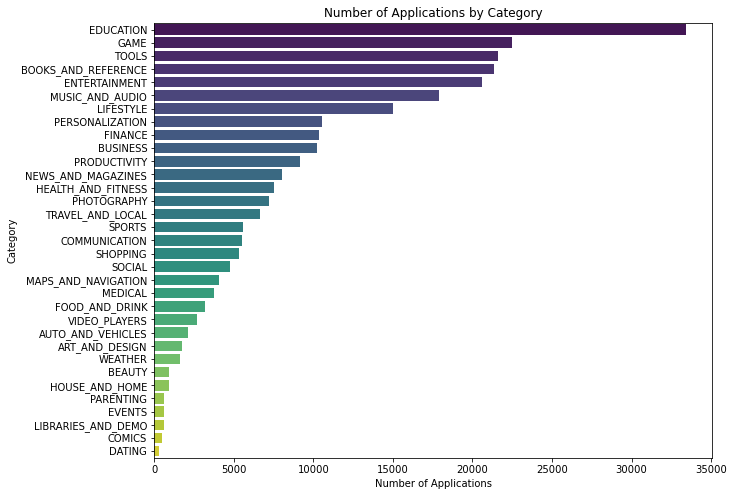

In [9]:
import seaborn as sns  # Make sure to import Seaborn

# Assuming 'df' is your DataFrame and it's already defined
plt.figure(figsize=(10, 8))
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts, y=category_counts.index, palette="viridis")
plt.title('Number of Applications by Category')
plt.xlabel('Number of Applications')
plt.ylabel('Category')
plt.show()

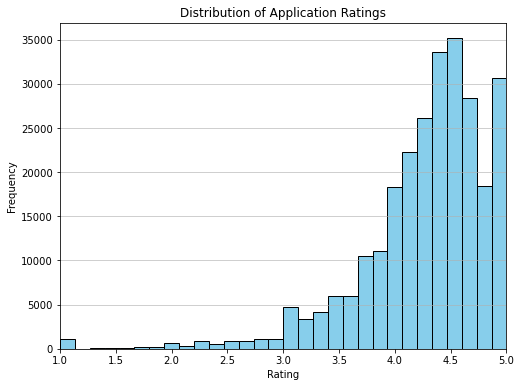

In [10]:
# Plot a histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Application Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(1, 5)  # Ratings typically range from 1 to 5
plt.grid(axis='y', alpha=0.75)
plt.show()

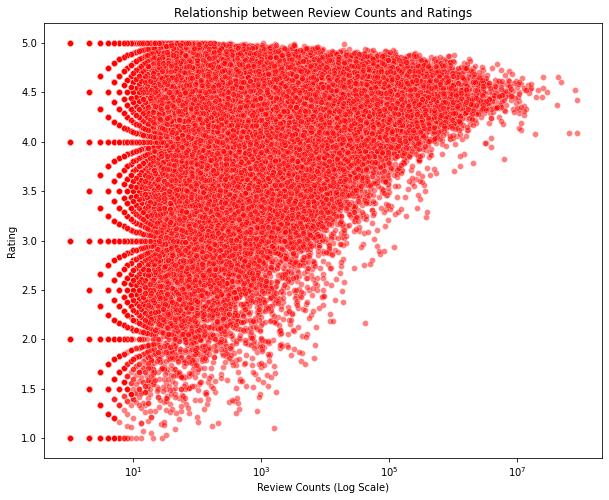

In [11]:
# Visualize the relationship between review counts and ratings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Reviews', y='Rating', data=df, alpha=0.5, color='red')
plt.title('Relationship between Review Counts and Ratings')
plt.xscale('log')  # Using a log scale for review counts due to a wide range
plt.xlabel('Review Counts (Log Scale)')
plt.ylabel('Rating')
plt.show()

#### Creating a SparkSession
This section initializes a SparkSession for your Spark application. This is the first step when working with Spark and provides access to all Spark functionalities.

In [12]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Play Store App Rating Prediction") \
    .getOrCreate()


24/04/07 04:39:07 WARN Utils: Your hostname, ubuntu resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
24/04/07 04:39:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/07 04:39:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/07 04:39:09 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/04/07 04:39:09 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


#### Reading Data

In [13]:
file_path = 'file:///home/hduser/Desktop/Playstore_Bigdata_Project/Data.csv'
df_spark = spark.read.csv(file_path, header=True, inferSchema=True)

#### Preparing Data
In the data preparation phase, you use StringIndexer and OneHotEncoder to process categorical columns. VectorAssembler is used to create feature vectors, and StandardScaler scales the features.

In [14]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler


indexer = StringIndexer(inputCols=["Category", "Content Rating"], outputCols=["Category_Indexed", "Content_Rating_Indexed"])


encoder = OneHotEncoder(inputCols=indexer.getOutputCols(), outputCols=["Category_Encoded", "Content_Rating_Encoded"])


assembler = VectorAssembler(inputCols=["Reviews", "Size", "Price", "Category_Encoded", "Content_Rating_Encoded"], outputCol="features")


scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")



#### Building a Pipeline and Processing Data
Here, you create a Pipeline to apply all data preparation steps in a single operation and process the data. Then, you select the feature vectors and labels (Rating).

In [15]:
from pyspark.ml import Pipeline


pipeline = Pipeline(stages=[indexer, encoder, assembler, scaler])


df_processed = pipeline.fit(df_spark).transform(df_spark).select("scaledFeatures", "Rating")


#### Creating, Training, and Evaluating the TensorFlow Model
You convert your dataset to a TensorFlow-compatible format, create a TensorFlow model, train the model, and evaluate its performance using Python's tensorflow library.

In [16]:
import tensorflow as tf
num_rows = df_processed.count()


def spark_to_tf(df):
    return tf.data.Dataset.from_tensor_slices((
        df.select("scaledFeatures").rdd.map(lambda x: x[0].toArray()).collect(),
        df.select("Rating").rdd.map(lambda x: x[0]).collect()
    ))


train_data, test_data = spark_to_tf(df_processed).shuffle(1000).batch(32).repeat(), spark_to_tf(df_processed).batch(32)


model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(64, activation='relu', input_shape=(df_processed.select("scaledFeatures").limit(1).rdd.map(lambda x: len(x[0])).collect()[0],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


model.fit(train_data, epochs=10, steps_per_epoch=num_rows // 32, validation_data=test_data, validation_steps=num_rows // 32)


test_loss, test_mae = model.evaluate(test_data, steps=num_rows // 32)
print(f'Test MAE: {test_mae}')


2024-04-07 04:39:46.133626: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-07 04:39:47.108527: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/10


/home/hduser/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8344/8344 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.5135 - mae: 0.4592 - val_loss: 0.3366 - val_mae: 0.4166
Epoch 2/10
8344/8344 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.2949 - mae: 0.3800 - val_loss: 0.2049 - val_mae: 0.4672
Epoch 3/10
  71/8344 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.3123 - mae: 0.2979

2024-04-07 04:40:47.180048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8344/8344 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.2857 - mae: 0.3762 - val_loss: 0.3451 - val_mae: 0.4430
Epoch 4/10
8322/8344 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2842 - mae: 0.3756

2024-04-07 04:41:19.302028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8344/8344 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.2843 - mae: 0.3757 - val_loss: 0.1930 - val_mae: 0.4720
Epoch 5/10
8344/8344 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.2806 - mae: 0.3740 - val_loss: 0.3317 - val_mae: 0.4110
Epoch 6/10
8344/8344 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.2799 - mae: 0.3737 - val_loss: 0.1910 - val_mae: 0.4785
Epoch 7/10
  75/8344 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.2410 - mae: 0.3297

2024-04-07 04:41:52.321018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8344/8344 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.2786 - mae: 0.3733 - val_loss: 0.3365 - val_mae: 0.4044
Epoch 8/10
8344/8344 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.2785 - mae: 0.3727 - val_loss: 0.1892 - val_mae: 0.4718
Epoch 9/10
  68/8344 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2728 - mae: 0.3444

2024-04-07 04:42:23.690484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8344/8344 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.2790 - mae: 0.3731 - val_loss: 0.3351 - val_mae: 0.4281
Epoch 10/10
8344/8344 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.2771 - mae: 0.3720 - val_loss: 0.1903 - val_mae: 0.4871


2024-04-07 04:42:55.947166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


8344/8344 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2855 - mae: 0.3942
Test MAE: 0.42922452092170715
